### Downloading from Kaggle and turning into SQL database file **(Error Messages Will Appear)** 

Database will lock after inital download and will read many errors, don't be discouraged. 

In [170]:
import kagglehub
import os
path = kagglehub.dataset_download("prasad22/healthcare-dataset")

print("Path to dataset files:", path)

files = os.listdir(path)
print("Files in dataset:", files)

healthcare_dataset = pd.read_csv("/Users/joey/.cache/kagglehub/datasets/prasad22/healthcare-dataset/versions/2/healthcare_dataset.csv")

conn = sqlite3.connect("healthcare_analytics.db")

healthcare_dataset.to_sql("healthcare_table",conn, if_exists="replace",index=False)

conn.close()

print("Dataset successfully imported into SQLite")

Path to dataset files: /Users/joey/.cache/kagglehub/datasets/prasad22/healthcare-dataset/versions/2
Files in dataset: ['healthcare_dataset.csv']


DatabaseError: Execution failed on sql 'DROP TABLE "healthcare_table"': database is locked

In [171]:
import sqlite3
conn = sqlite3.connect("healthcare_analytics.db")

cursor = conn.cursor()

#### Running Query to determine how many and where are NULL values reported

In [172]:
query = """
SELECT * FROM healthcare_table 
WHERE Name IS NULL 
OR Age IS NULL 
OR Gender IS NULL 
OR "Blood Type" IS NULL 
OR "Medical Condition" IS NULL 
OR "Date of Admission" IS NULL 
OR Doctor IS NULL 
OR Hospital IS NULL 
OR "Insurance Provider" IS NULL 
OR "Billing Amount" IS NULL 
OR "Room Number" IS NULL 
OR "Admission Type" IS NULL 
OR "Discharge Date" IS NULL 
OR Medication IS NULL 
OR "Test Results" IS NULL
"""

df = pd.read_sql_query(query, conn)

print(df) 

# Empty DataFrame = No NULL values present



Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results]
Index: []


#### Using SQL to determine the number of patients each doctor has. 

#### Next Query to determine the number of pateints per specific hosptial 

In [173]:
query = """
SELECT Doctor, COUNT(Name) AS Number_of_Patients 
FROM healthcare_table 
GROUP BY Doctor;
"""

df = pd.read_sql_query(query,conn)
print(df.head(10))

query = """
SELECT Hospital, COUNT(Name) AS Number_of_Patients 
FROM healthcare_table 
GROUP BY Hospital;
"""

df = pd.read_sql_query(query,conn)
print(df.head(10))



            Doctor  Number_of_Patients
0    Aaron Acevedo                   1
1      Aaron Adams                   1
2    Aaron Aguilar                   1
3  Aaron Alexander                   1
4   Aaron Anderson                   1
5     Aaron Arnold                   1
6      Aaron Baker                   2
7     Aaron Barker                   1
8    Aaron Barrett                   1
9      Aaron Barry                   1
                        Hospital  Number_of_Patients
0                     Abbott Inc                   1
1                     Abbott Ltd                   1
2     Abbott Moore and Williams,                   1
3  Abbott and Thompson, Sullivan                   1
4     Abbott, Peters and Hoffman                   2
5   Abbott, Vazquez Bautista and                   1
6                Abbott-Castillo                   1
7                 Abbott-Coleman                   1
8                 Abbott-Ferrell                   1
9                    Abbott-Hill         

#### Determing doctors prescribing patterns


#### Also Determing the Number of Doctors

#### Looking into Dr. Aaron Adams Specific number of medications prescribed and what they are 


In [182]:
query = """
SELECT Doctor, Medication, COUNT(*) as Number_of_Prescriptions
FROM healthcare_table 
GROUP BY Doctor
ORDER BY Doctor, Number_of_Prescriptions;
"""

df = pd.read_sql_query(query,conn)
print(df)


query = """
SELECT COUNT(DISTINCT Doctor) AS Number_of_Doctors
FROM healthcare_table;
"""

df = pd.read_sql_query(query,conn)
print(df.head(10))

query = """
SELECT Doctor, Medication, COUNT(Medication) AS Medications_Prescribed
FROM healthcare_table
WHERE Doctor = "Aaron Adams"
GROUP BY Doctor;
"""

df = pd.read_sql_query(query,conn)
print(df)

                Doctor   Medication  Number_of_Prescriptions
0        Aaron Acevedo  Paracetamol                        1
1          Aaron Adams  Paracetamol                        1
2        Aaron Aguilar      Aspirin                        1
3      Aaron Alexander      Aspirin                        1
4       Aaron Anderson  Paracetamol                        1
...                ...          ...                      ...
40336         Zoe Khan      Lipitor                        1
40337       Zoe Knight    Ibuprofen                        1
40338      Zoe Nichols      Lipitor                        1
40339      Zoe Roberts   Penicillin                        1
40340      Zoe Wallace   Penicillin                        1

[40341 rows x 3 columns]
   Number_of_Doctors
0              40341
        Doctor   Medication  Medications_Prescribed
0  Aaron Adams  Paracetamol                       1


    Medication  Quantity
0      Aspirin     11094
1    Ibuprofen     11127
2      Lipitor     11140
3  Paracetamol     11071
4   Penicillin     11068


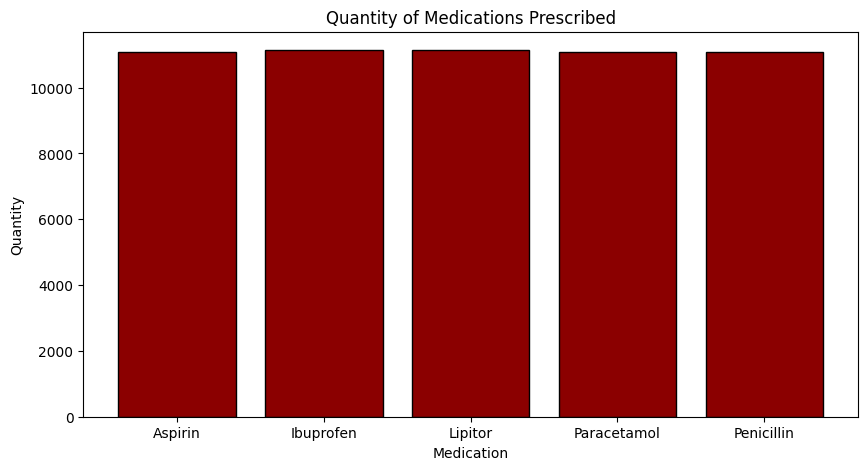

   Gender  Number_of_People
0  Female             27726
1    Male             27774


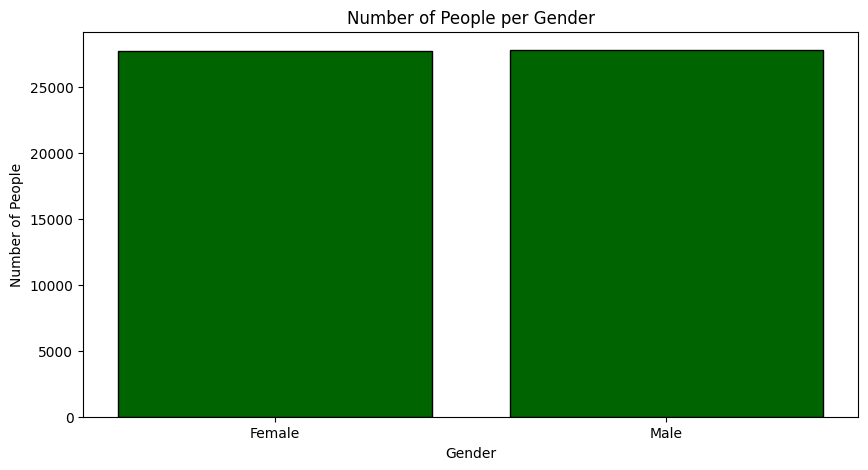

  Blood Type  Count
0         A+   6956
1         A-   6969
2        AB+   6947
3        AB-   6945
4         B+   6945
5         B-   6944
6         O+   6917
7         O-   6877


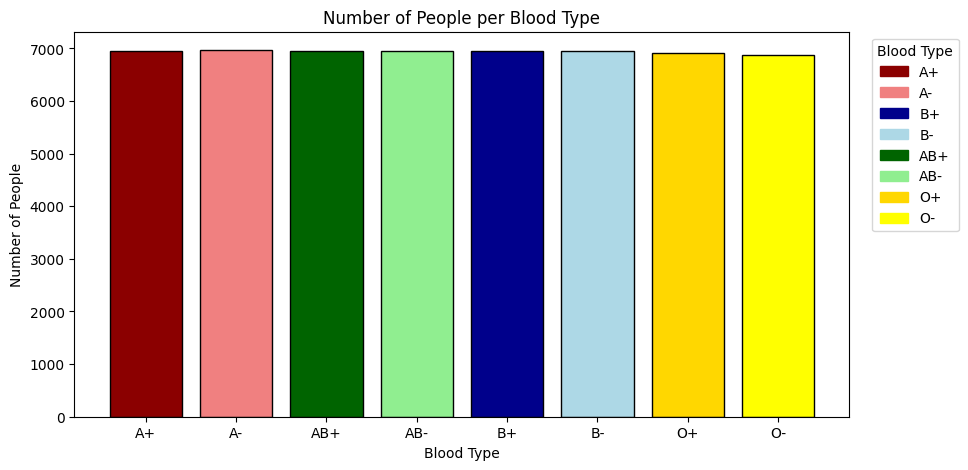

  Medical Condition  Count
0         Arthritis   9308
1            Asthma   9185
2            Cancer   9227
3          Diabetes   9304
4      Hypertension   9245
5           Obesity   9231


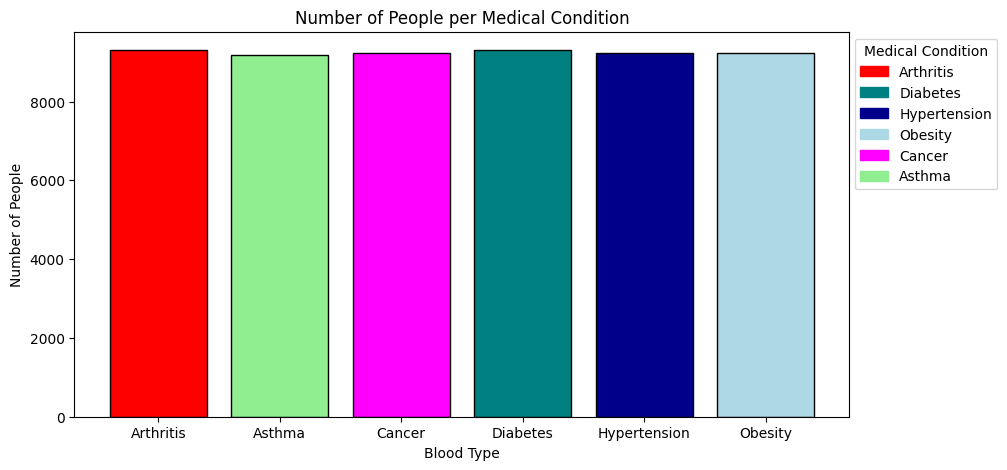

In [168]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

query = """
SELECT Medication, COUNT(Medication) AS Quantity
FROM healthcare_table
GROUP BY Medication;
"""

df = pd.read_sql_query(query,conn)
print(df)

x = df['Medication']
y = df['Quantity']
plt.figure(figsize=(10,5))
plt.bar(x,y,color="darkred",edgecolor="black")
plt.xlabel("Medication")
plt.ylabel("Quantity")
plt.title("Quantity of Medications Prescribed")
plt.grid(False)
plt.show()

query = """
SELECT Gender, COUNT(Gender) AS Number_of_People
FROM healthcare_table
GROUP BY Gender;
"""

df = pd.read_sql_query(query,conn)
print(df)

x = df['Gender']
y = df['Number_of_People']

plt.figure(figsize=(10,5))
plt.bar(x,y,color="darkgreen",edgecolor="black")
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.title("Number of People per Gender")
plt.grid(False)
plt.show()


query = """
SELECT "Blood Type", COUNT("Blood Type") AS Count
FROM healthcare_table
GROUP BY "Blood Type";
"""

df = pd.read_sql_query(query,conn)
print(df)

x = df['Blood Type']
y = df['Count']
color_map = {
    "A+": "darkred",
    "A-": "lightcoral",
    "B+": "darkblue",
    "B-": "lightblue",
    "AB+": "darkgreen",
    "AB-": "lightgreen",
    "O+": "gold",
    "O-": "yellow"
}

colors=[color_map[blood] for blood in x]


plt.figure(figsize=(10,5))
plt.bar(x,y,color=colors,edgecolor="black")
plt.xlabel("Blood Type")
plt.ylabel("Number of People")
plt.title("Number of People per Blood Type")
plt.grid(False)
legend_patches = [mpatches.Patch(color=color_map[blood], label=blood) for blood in color_map]
plt.legend(handles = legend_patches, title = "Blood Type", loc = "upper right", bbox_to_anchor = (1.15,1))
plt.show()


query = """
SELECT "Medical Condition", COUNT("Medical Condition") AS Count
FROM healthcare_table
GROUP BY "Medical Condition";
"""

df = pd.read_sql_query(query,conn)
print(df)

x = df['Medical Condition']
y = df['Count']
color_map = {
    "Arthritis": "red",
    "Diabetes": "teal",
    "Hypertension": "darkblue",
    "Obesity": "lightblue",
    "Cancer": "magenta",
    "Asthma": "lightgreen"
}

colors=[color_map[condition] for condition in x]


plt.figure(figsize=(10,5))
plt.bar(x,y,color=colors,edgecolor="black")
plt.xlabel("Blood Type")
plt.ylabel("Number of People")
plt.title("Number of People per Medical Condition")
plt.grid(False)
legend_patches = [mpatches.Patch(color=color_map[condition], label=condition) for condition in color_map]
plt.legend(handles = legend_patches, title = "Medical Condition", loc = "upper right", bbox_to_anchor = (1.2,1))
plt.show()




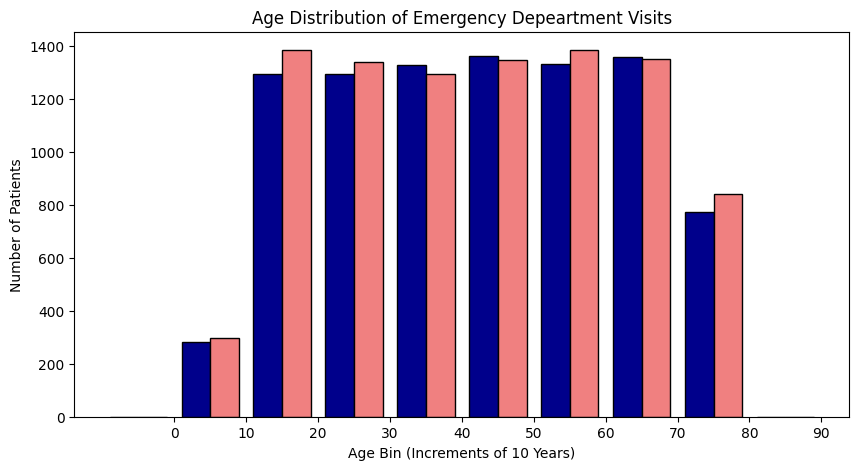

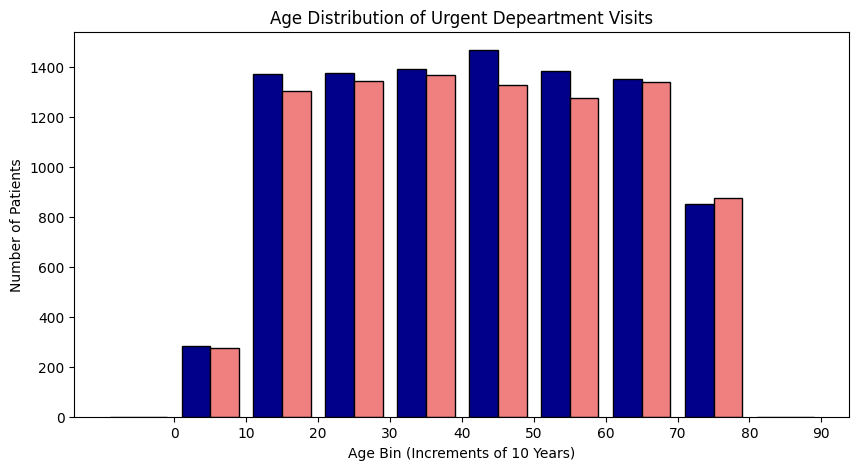

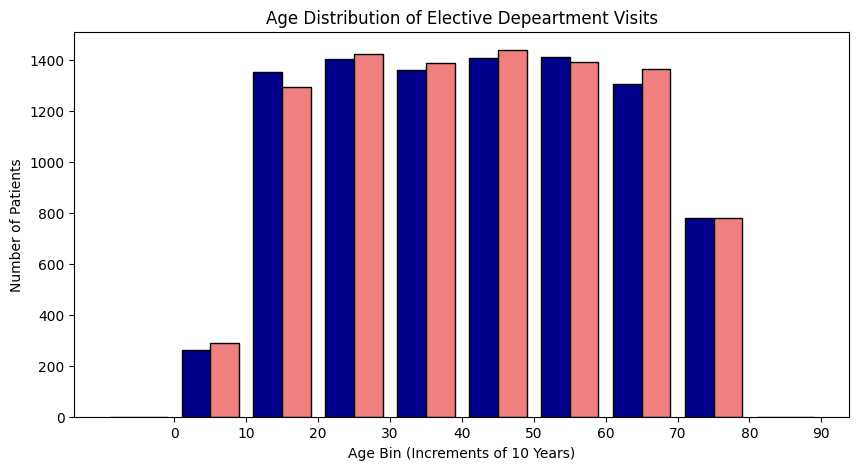

In [132]:
import matplotlib.pyplot as plt
import numpy as np

query = query = 'SELECT * FROM healthcare_table WHERE `Admission Type` = "Emergency";'
emergency_df = pd.read_sql_query(query,conn)

query = query = 'SELECT * FROM healthcare_table WHERE `Admission Type` = "Elective";'
Elective_df = pd.read_sql_query(query,conn)

query = query = 'SELECT * FROM healthcare_table WHERE `Admission Type` = "Urgent";'
Urgent_df = pd.read_sql_query(query,conn)





male_data=emergency_df[emergency_df["Gender"] == "Male"]["Age"]
female_data=emergency_df[emergency_df["Gender"]=="Female"]["Age"]
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

male_hist, bin_edges = np.histogram(male_data, bins=age_bins)
female_hist, _ = np.histogram(female_data, bins=age_bins)

plt.figure(figsize=(10,5))
plt.bar(bin_edges[:-1]-7, male_hist, width = 4, color="darkblue", edgecolor="black", label = "Male", align= "center")
plt.bar(bin_edges[:-1]-3, female_hist, width = 4, color="lightcoral", edgecolor="black", label = "Female", align= "center")
plt.xlabel("Age Bin (Increments of 10 Years)")
plt.ylabel("Number of Patients")
plt.title("Age Distribution of Emergency Depeartment Visits")
plt.xticks(np.arange(0,100,10))
plt.grid(False)
plt.show()

male_data=Urgent_df[Urgent_df["Gender"] == "Male"]["Age"]
female_data=Urgent_df[Urgent_df["Gender"]=="Female"]["Age"]
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

male_hist, bin_edges = np.histogram(male_data, bins=age_bins)
female_hist, _ = np.histogram(female_data, bins=age_bins)

plt.figure(figsize=(10,5))
plt.bar(bin_edges[:-1]-7, male_hist, width = 4, color="darkblue", edgecolor="black", label = "Male", align= "center")
plt.bar(bin_edges[:-1]-3, female_hist, width = 4, color="lightcoral", edgecolor="black", label = "Female", align= "center")
plt.xlabel("Age Bin (Increments of 10 Years)")
plt.ylabel("Number of Patients")
plt.title("Age Distribution of Urgent Depeartment Visits")
plt.xticks(np.arange(0,100,10))
plt.grid(False)
plt.show()


male_data=Elective_df[Elective_df["Gender"] == "Male"]["Age"]
female_data=Elective_df[Elective_df["Gender"]=="Female"]["Age"]
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

male_hist, bin_edges = np.histogram(male_data, bins=age_bins)
female_hist, _ = np.histogram(female_data, bins=age_bins)

plt.figure(figsize=(10,5))
plt.bar(bin_edges[:-1]-7, male_hist, width = 4, color="darkblue", edgecolor="black", label = "Male", align= "center")
plt.bar(bin_edges[:-1]-3, female_hist, width = 4, color="lightcoral", edgecolor="black", label = "Female", align= "center")
plt.xlabel("Age Bin (Increments of 10 Years)")
plt.ylabel("Number of Patients")
plt.title("Age Distribution of Elective Depeartment Visits")
plt.xticks(np.arange(0,100,10))
plt.grid(False)
plt.show()




## Machine Learning Objective 

Predicting a patients Medical Condition from Age, Gender, Medications, and Medical Condition using a Random Forest Model

** Note No Results Yeilded as dataset is a dummy dataset of no correlation **

In [169]:

query = """
SELECT Age, Gender, "Medication","Medical Condition" 
FROM healthcare_table 
"""
OB1_df = pd.read_sql_query(query, conn)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

#------------------------------------------------------
Label_encoders = {}
for col in ["Gender", "Medication"]:
    le = LabelEncoder()
    OB1_df[col] = le.fit_transform(OB1_df[col])
    Label_encoders[col] = le

target_encoder = LabelEncoder()
OB1_df["Medical Condition"] = target_encoder.fit_transform(OB1_df["Medical Condition"])

X = OB1_df.drop(columns=["Medical Condition"]).values
Y = OB1_df["Medical Condition"].values 

#---------------------------------------------------------

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

scaler = StandardScaler()
X_train[:, 0] = scaler.fit_transform(X_train[:, [0]]).flatten()
X_test[:, 0] = scaler.transform(X_test[:, [0]]).flatten()

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

#-----------------------------------------------------------------

Y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(Y_test, Y_pred, target_names=target_encoder.classes_))

cv_scores = cross_val_score(rf_model, X_train, Y_train, cv = 5)
print(f"Cross-validation accuracy: {cv_scores.mean():.4f}")



Accuracy: 0.1730
              precision    recall  f1-score   support

   Arthritis       0.17      0.22      0.19      1862
      Asthma       0.17      0.09      0.12      1837
      Cancer       0.17      0.12      0.14      1845
    Diabetes       0.17      0.33      0.23      1861
Hypertension       0.18      0.16      0.17      1849
     Obesity       0.17      0.12      0.14      1846

    accuracy                           0.17     11100
   macro avg       0.17      0.17      0.16     11100
weighted avg       0.17      0.17      0.16     11100

Cross-validation accuracy: 0.1694


## Machine Learning Objective #2 

Insurance Fraud Detection: Flag Suspicious Billing Amounts by learning normal billing patterns using Support Vector Machine using Medical Condition, Length of Stay, Billing Amount, and Hospital variables. 
Length of stay was calculated using the Date of Admission - Data of Discharge.

** Note No Results Yeilded as dataset is a dummy dataset of no correlation **


In [ ]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

query = """
SELECT "Medical Condition", "Date of Admission", "Billing Amount", "Discharge Date", Hospital
FROM healthcare_table 
"""
OB3_df = pd.read_sql_query(query, conn)

#Creating length of stay -----------------------------------------
OB3_df["Date of Admission"] = pd.to_datetime(OB3_df["Date of Admission"])
OB3_df["Discharge Date"] = pd.to_datetime(OB3_df["Discharge Date"])
OB3_df["Length of Stay"] = (OB3_df["Discharge Date"]- OB3_df["Date of Admission"]).dt.days

print(OB3_df)

#--------------------------------------------------------------------
encoder = LabelEncoder()
OB3_df['Hospital'] = encoder.fit_transform(OB3_df["Hospital"])
OB3_df['Medical Condition'] = encoder.fit_transform(OB3_df['Medical Condition'])

X = OB3_df[['Hospital', 'Length of Stay', 'Medical Condition']]
Y = OB3_df['Billing Amount']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

svm_model = SVR(kernel='linear')
svm_model.fit(X_train, Y_train)

Y_pred = svm_model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))
print("R² Score:", r2_score(Y_test, Y_pred))

      Medical Condition Date of Admission  Billing Amount Discharge Date  \
0                Cancer        2024-01-31    18856.281306     2024-02-02   
1               Obesity        2019-08-20    33643.327287     2019-08-26   
2               Obesity        2022-09-22    27955.096079     2022-10-07   
3              Diabetes        2020-11-18    37909.782410     2020-12-18   
4                Cancer        2022-09-19    14238.317814     2022-10-09   
...                 ...               ...             ...            ...   
55495            Asthma        2020-08-16     2650.714952     2020-09-15   
55496           Obesity        2020-01-23    31457.797307     2020-02-01   
55497      Hypertension        2020-07-13    27620.764717     2020-08-10   
55498         Arthritis        2019-05-25    32451.092358     2019-05-31   
55499         Arthritis        2024-04-02     4010.134172     2024-04-29   

                           Hospital  Length of Stay  
0                   Sons and Mill